In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from pydiffmap import diffusion_map as dm

In [ ]:
pip install pydiffmap

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Newsgroup_Data/train.data', sep=' ', names=["docID", "wordID", "wordcount"])

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Newsgroup_Data/train.label', sep=' ', names=["label"])

In [ ]:
df

docID  wordID  wordcount
0            1       1          4
1            1       2          2
2            1       3         10
3            1       4          4
4            1       5          2
...        ...     ...        ...
1467340  11269   47387          1
1467341  11269   48339          1
1467342  11269   48919          1
1467343  11269   51544          1
1467344  11269   53958          1

[1467345 rows x 3 columns]

In [ ]:
labels

label
0          1
1          1
2          1
3          1
4          1
...      ...
11264     20
11265     20
11266     20
11267     20
11268     20

[11269 rows x 1 columns]

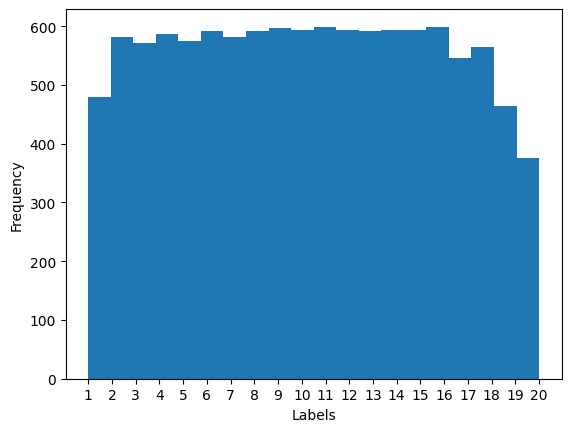

In [ ]:

plt.hist(labels, bins=20)


plt.xticks(range(1, 21))
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

In [ ]:
labels.value_counts()

label
16       599
11       598
9        596
10       594
12       594
14       594
15       593
6        592
8        592
13       591
4        587
7        582
2        581
5        575
3        572
18       564
17       545
1        480
19       464
20       376
dtype: int64

In [ ]:
target_labels = labels['label']

In [ ]:
type(target_labels)

pandas.core.series.Series

In [ ]:
data = df.pivot(index='docID', columns='wordID', values='wordcount').fillna(0).values

In [ ]:
data

array([[ 4.,  2., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
data.shape

(11269, 53975)

In [ ]:
np.random.seed(42)
random_indices = np.random.choice(data.shape[0], size=500, replace=False)
labels = labels.iloc[random_indices]
data = data[random_indices]




In [ ]:
target_labels = labels['label']

In [ ]:
labels.value_counts()

label
18       33
11       32
6        31
17       31
16       30
4        30
12       28
13       28
8        27
9        26
7        25
15       24
2        23
5        21
10       21
1        20
3        19
14       17
19       17
20       17
dtype: int64

In [ ]:
target_labels

9943     18
2517      5
3887      7
4981      9
6338     11
         ..
10408    18
8265     15
4513      8
8030     14
9325     17
Name: label, Length: 500, dtype: int64

In [ ]:
def isomap_embedding(data, n_neighbors, n_components = 2,):
 # Create a neighborhood graph using k-nearest neighbors
  nn = NearestNeighbors(n_neighbors=n_neighbors)
  nn.fit(data)
  neighbors_graph = nn.kneighbors_graph()

  # Apply Isomap to find the geodesic distances
  isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
  embedding = isomap.fit_transform(data)
  return embedding

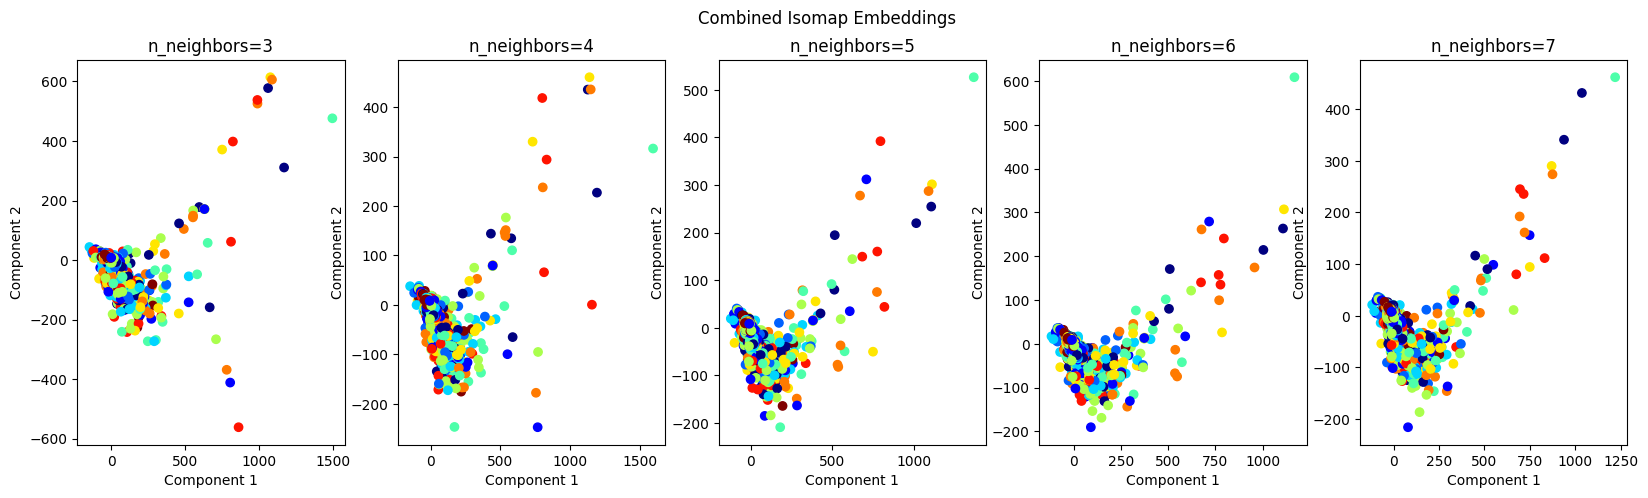

In [ ]:
def plot_combined_isomap_embeddings(data, n_neighbors_list, n_components=2):
    fig, axes = plt.subplots(1, len(n_neighbors_list), figsize=(20, 5))
    fig.suptitle('Combined Isomap Embeddings')

    for i, n_neighbors in enumerate(n_neighbors_list):
        embedding = isomap_embedding(data, n_neighbors, n_components)
        ax = axes[i]
        ax.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, cmap='jet')
        ax.set_title(f'n_neighbors={n_neighbors}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')


n_neighbors_list = [3, 4, 5, 6, 7]

plot_combined_isomap_embeddings(data, n_neighbors_list, n_components=2)

In [ ]:
def plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values):
    fig, axes = plt.subplots(1, len(learning_rate_values), figsize=(30, 5))
    fig.suptitle('t-SNE Embeddings with Varying learning rate and perplexity = {}'.format(perplexity))

    for i, learning_rate in enumerate(learning_rate_values):
        tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate)
        embedding = tsne.fit_transform(data)
        ax = axes[i]
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, cmap='jet', s = 20)
        ax.set_title(f'learning rate={learning_rate}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        fig.colorbar(scatter, ax=ax)

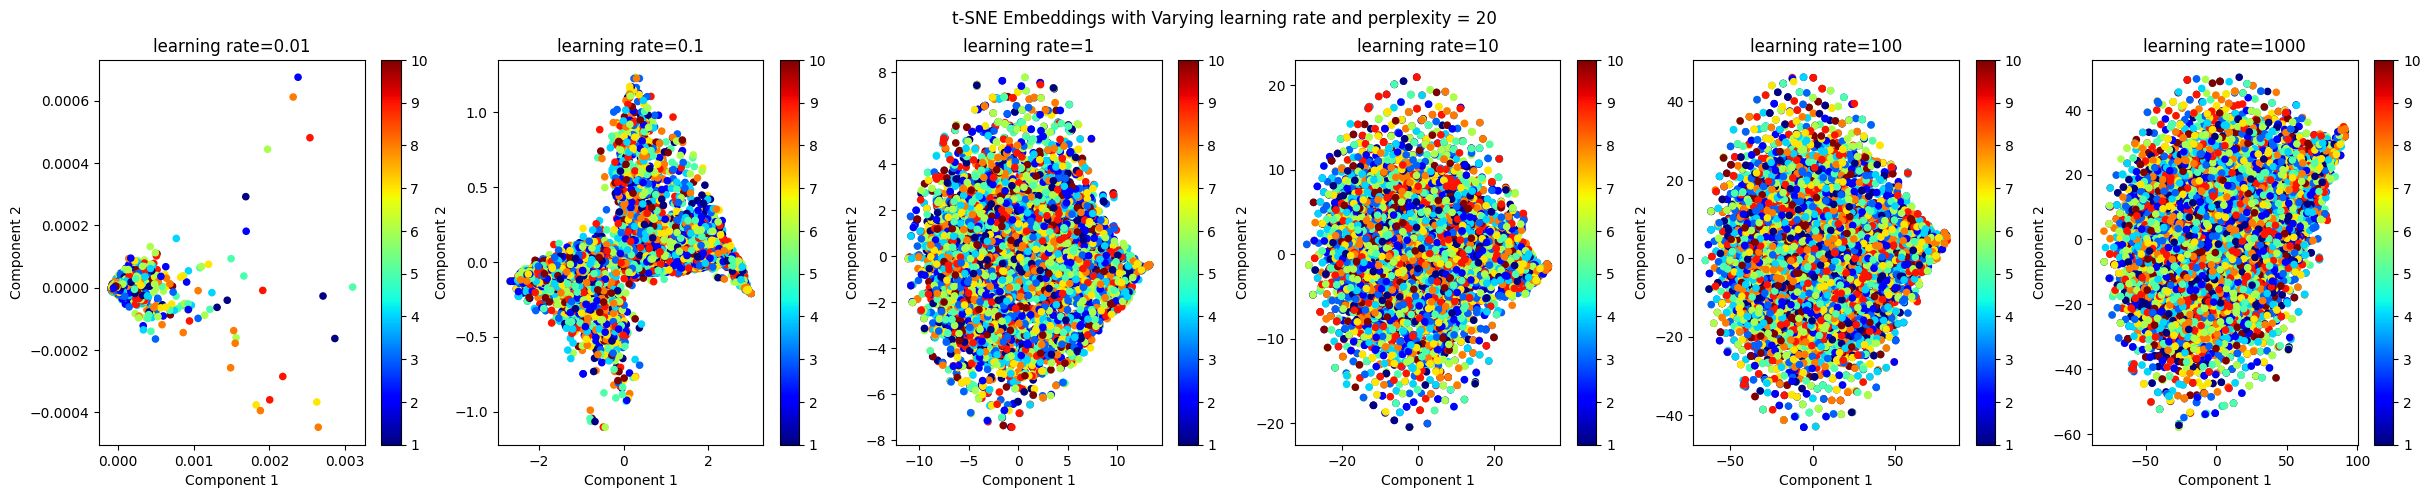

In [ ]:
n_components = 2
perplexity = 20
learning_rate_values = [0.01, 0.1, 1, 10, 100, 1000]

plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values)

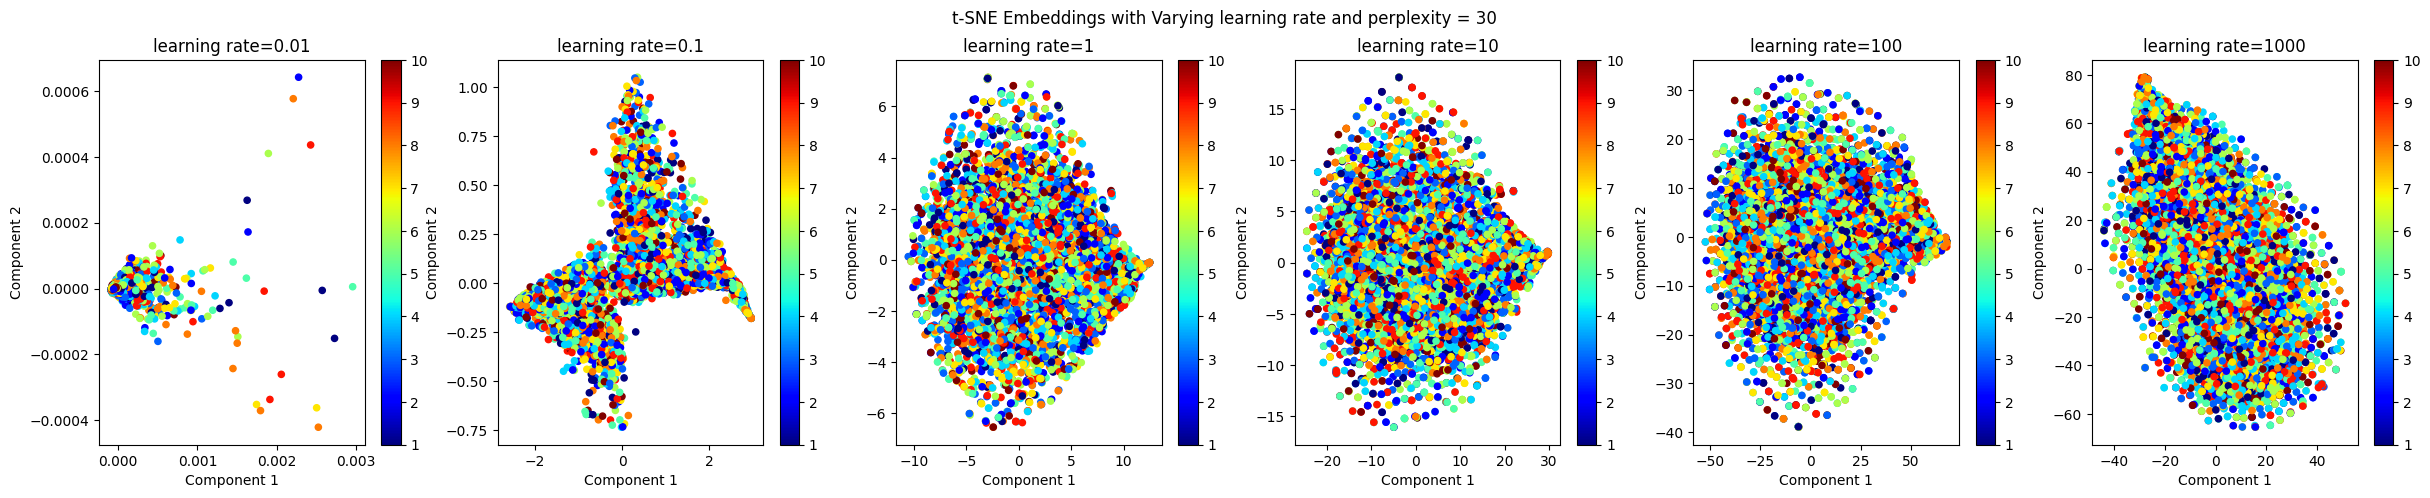

In [ ]:
perplexity = 30
plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values)

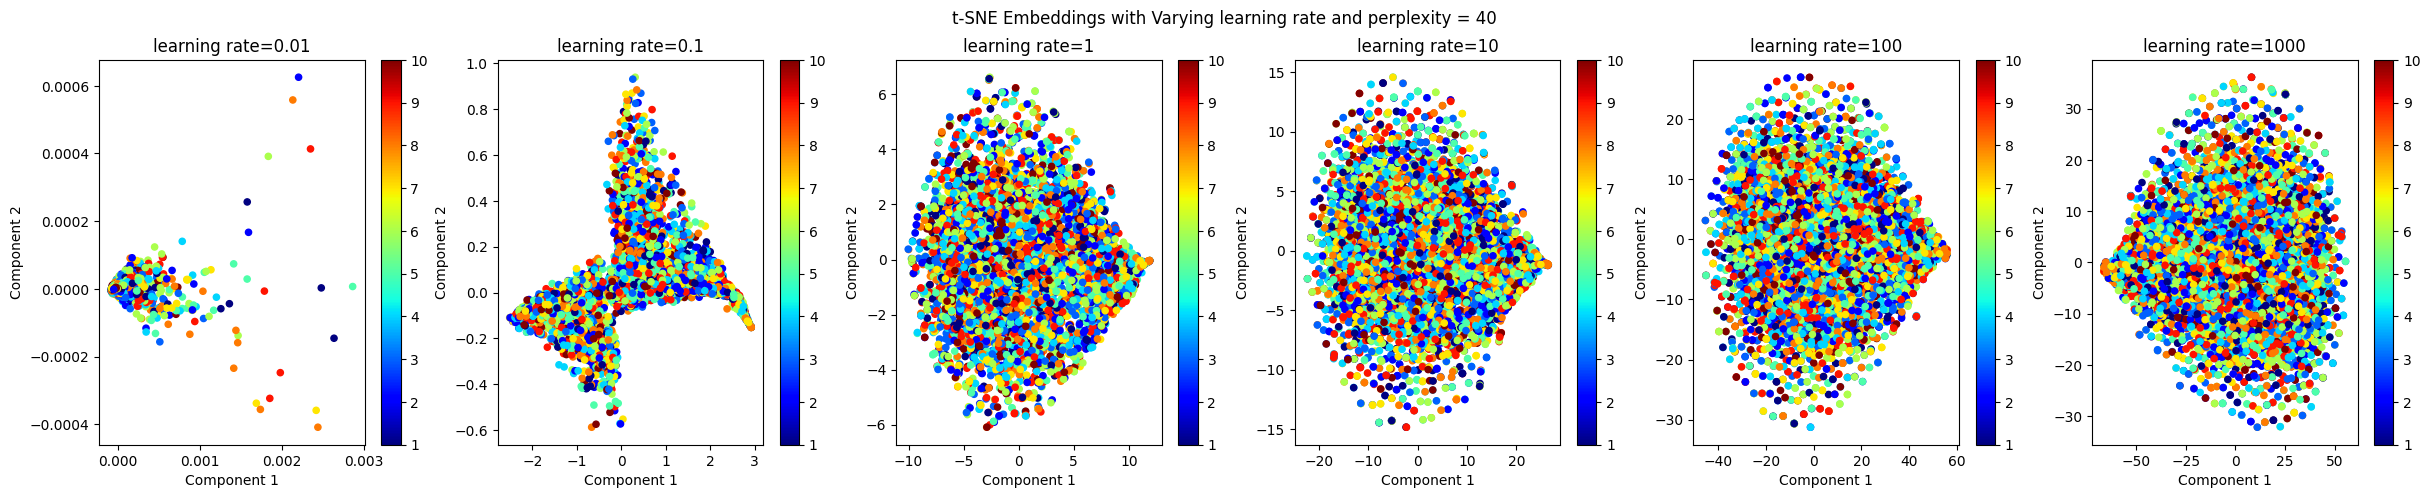

In [ ]:
n_components = 2
perplexity = 40


plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values)

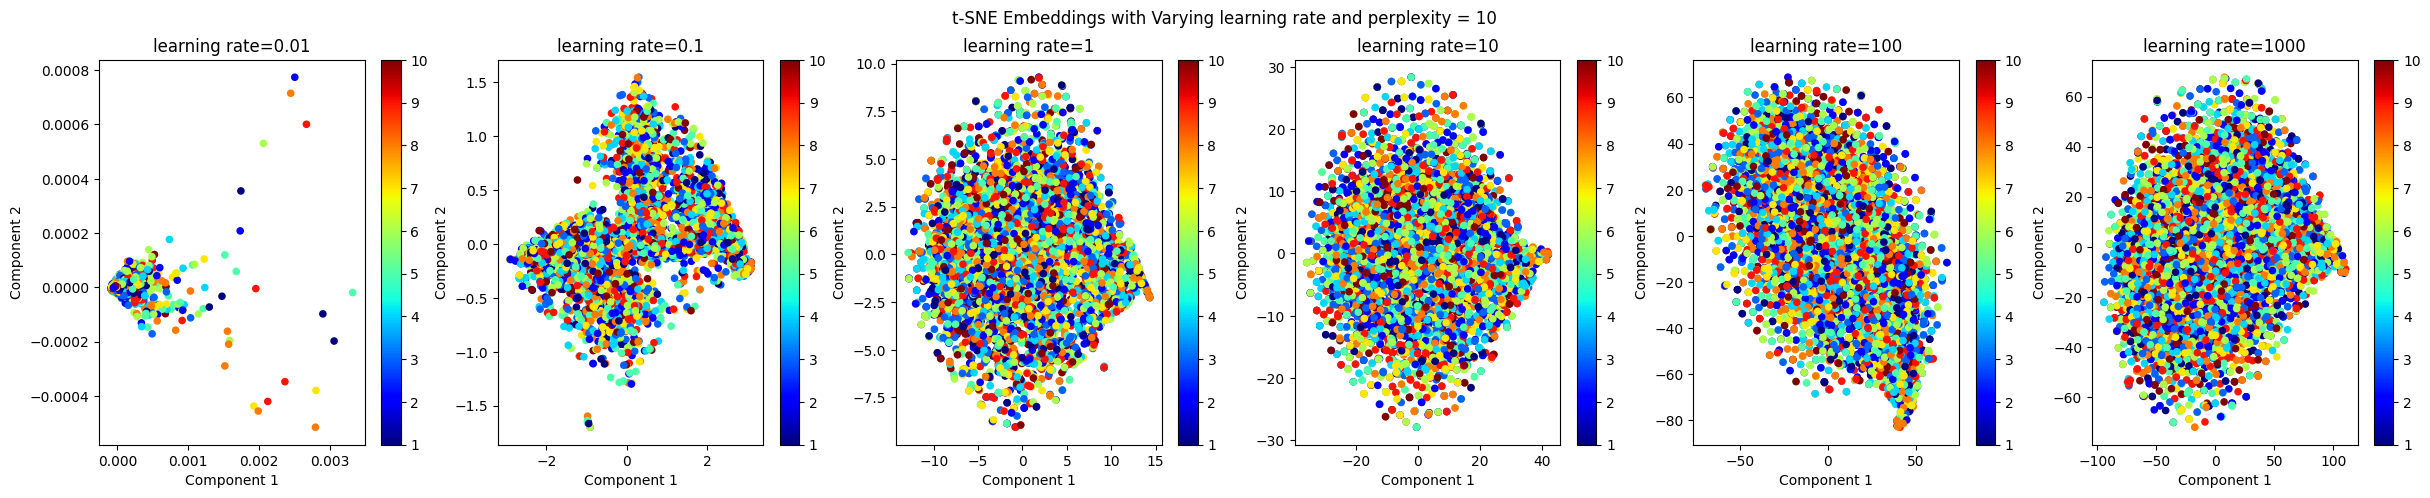

In [ ]:
n_components = 2
perplexity = 10


plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values)

In [ ]:
n_components = 2  # Number of dimensions for the low-dimensional representation

mds = MDS(n_components=n_components, dissimilarity='euclidean')
euclidean_embedding = mds.fit_transform(data,target_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


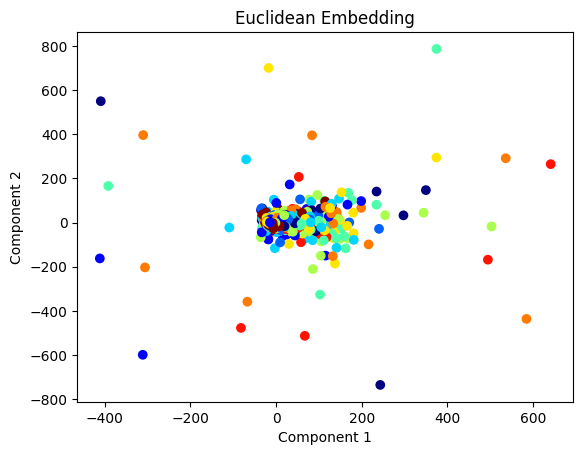

In [ ]:
plt.scatter(euclidean_embedding[:, 0], euclidean_embedding[:, 1], c=target_labels, cmap='jet')
plt.title('Euclidean Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

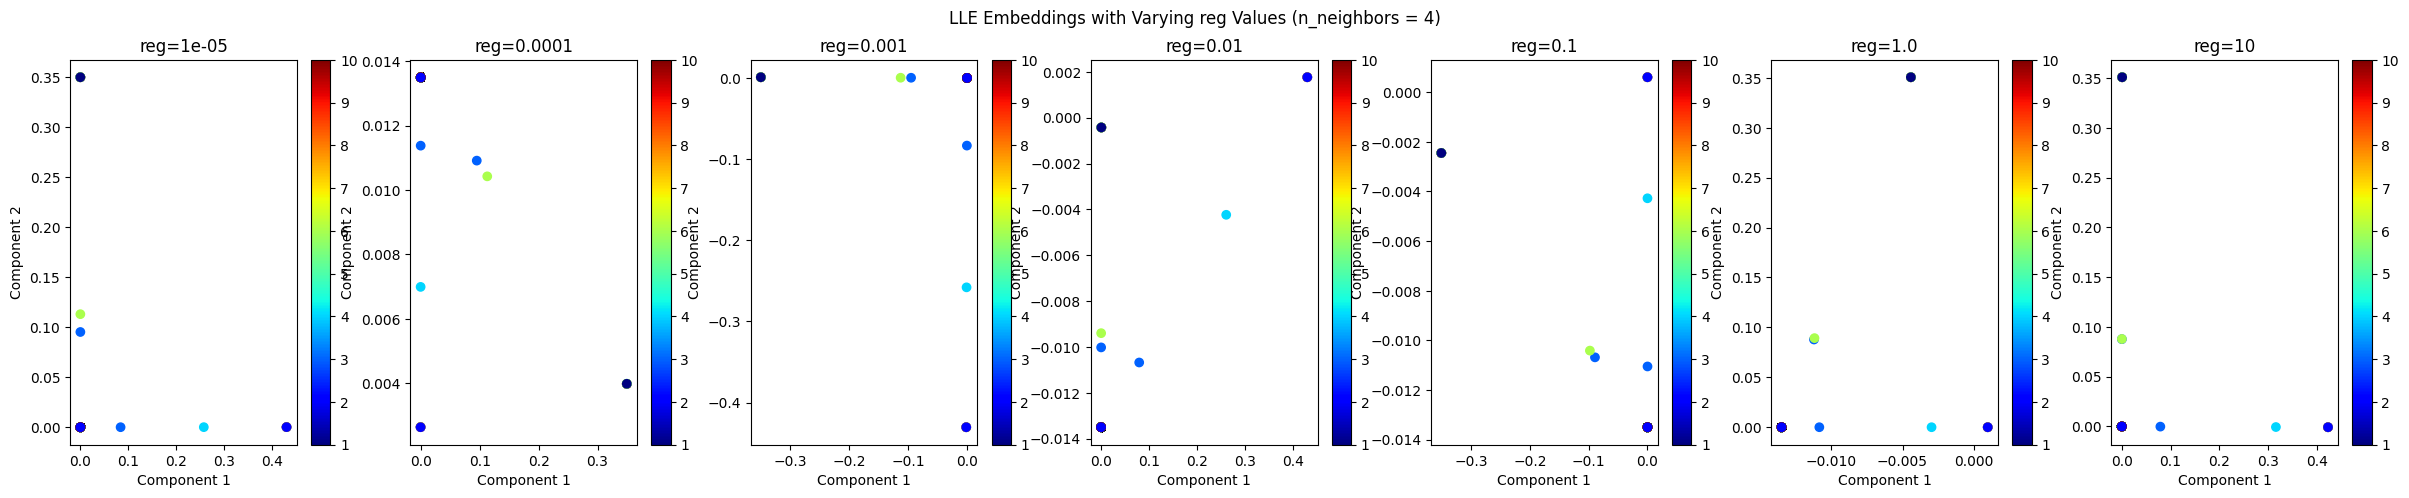

In [ ]:
def plot_lle_embeddings(data, n_components, n_neighbors, reg_values):
    fig, axes = plt.subplots(1, len(reg_values), figsize=(30, 5))
    fig.suptitle('LLE Embeddings with Varying reg Values (n_neighbors = {})'.format(n_neighbors))

    for i, reg in enumerate(reg_values):
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, reg=reg, method='standard')
        embedding = lle.fit_transform(data)
        ax = axes[i]
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, cmap='jet')
        ax.set_title(f'reg={reg}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        fig.colorbar(scatter, ax=ax)

# Parameters for the LLE embeddings
n_components = 2
n_neighbors = 4
reg_values = [0.00001, 0.0001,0.001, 0.01, 0.1, 1.0, 10]

# Create multiple plots with varying reg values
plot_lle_embeddings(data, n_components, n_neighbors, reg_values)
plt.show()

ValueError: ignored

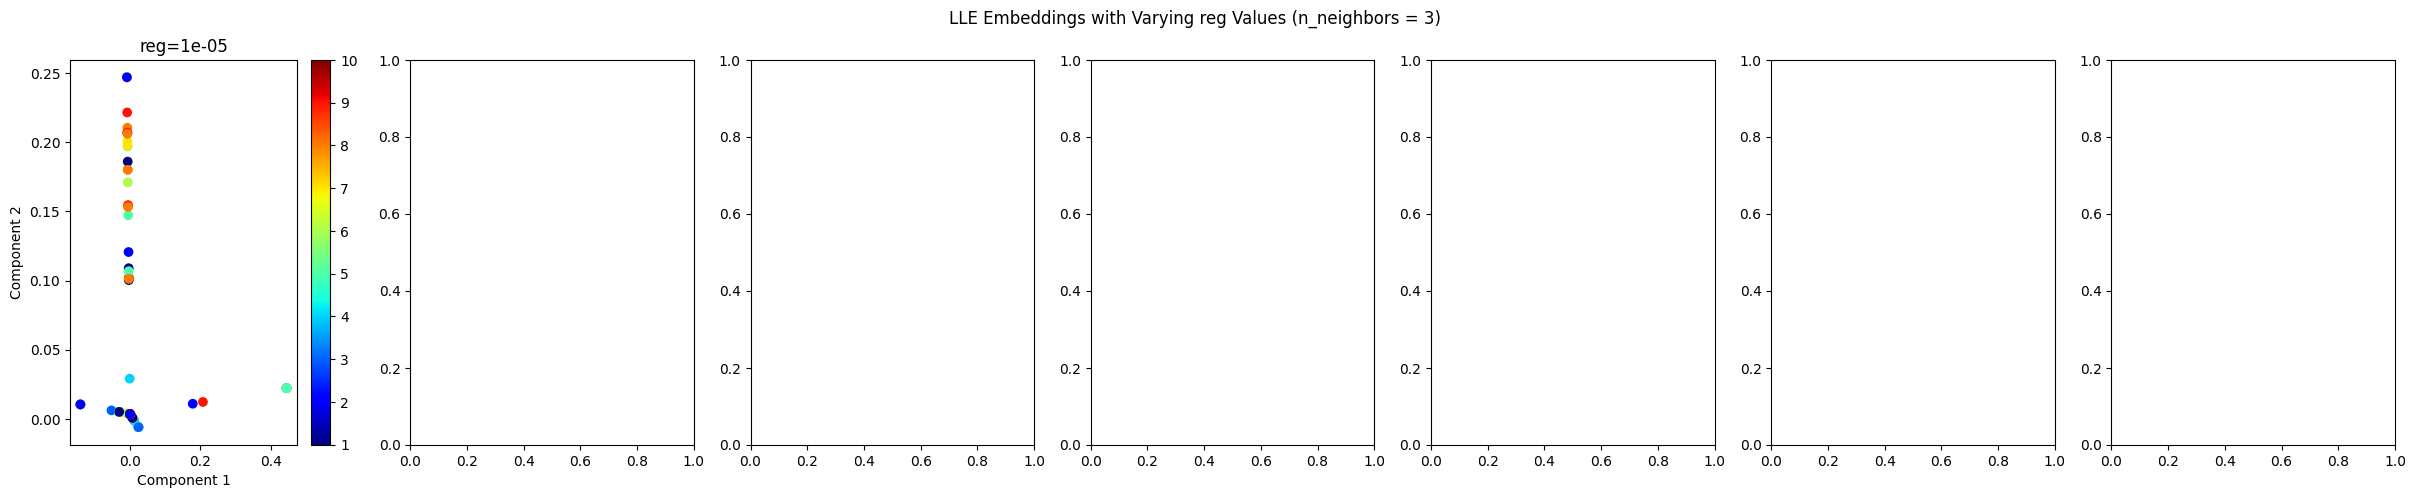

In [ ]:
plot_lle_embeddings(data, n_components, 3, reg_values)
plt.show()

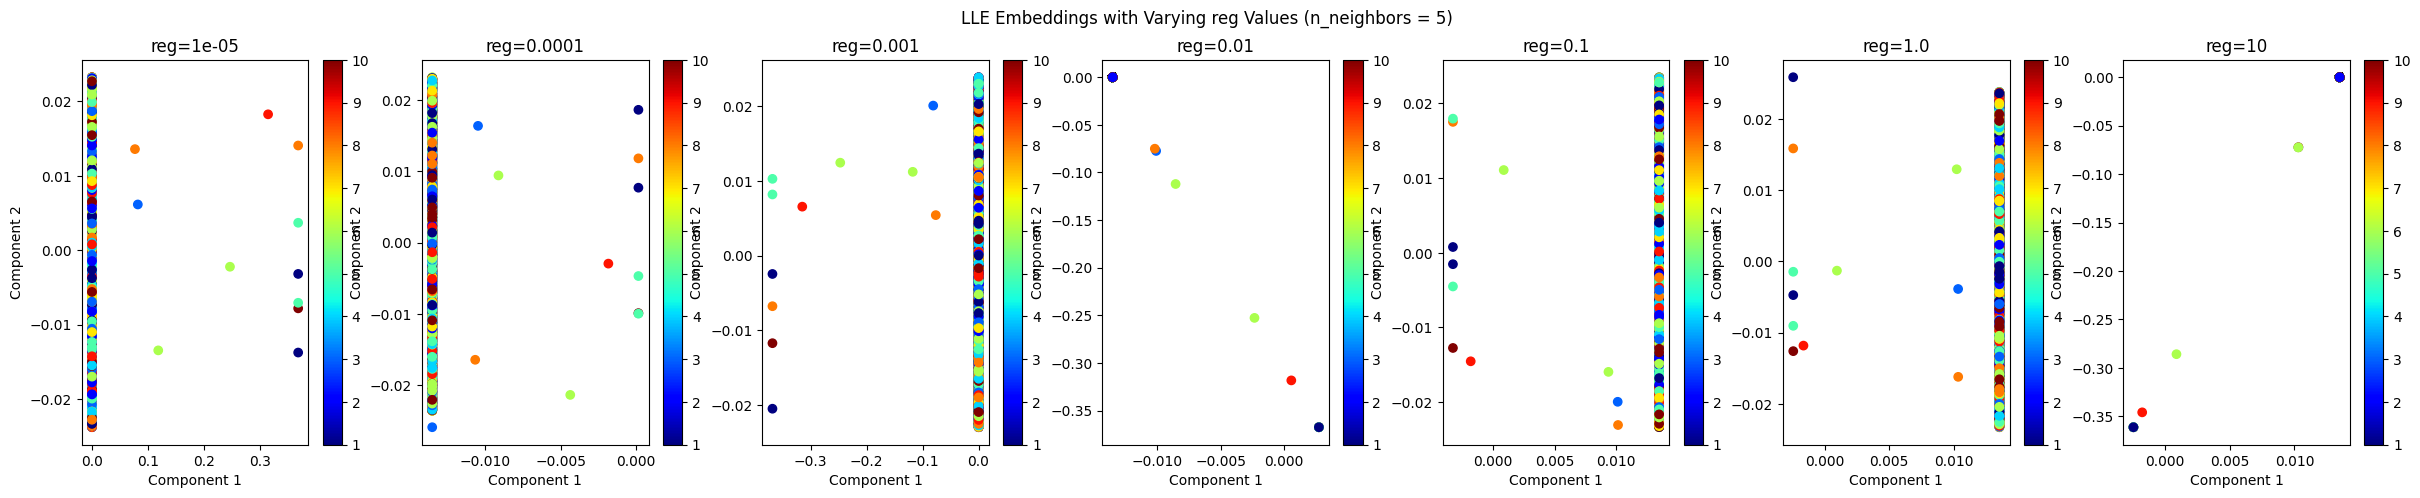

In [ ]:
plot_lle_embeddings(data, n_components, 5, reg_values)
plt.show()

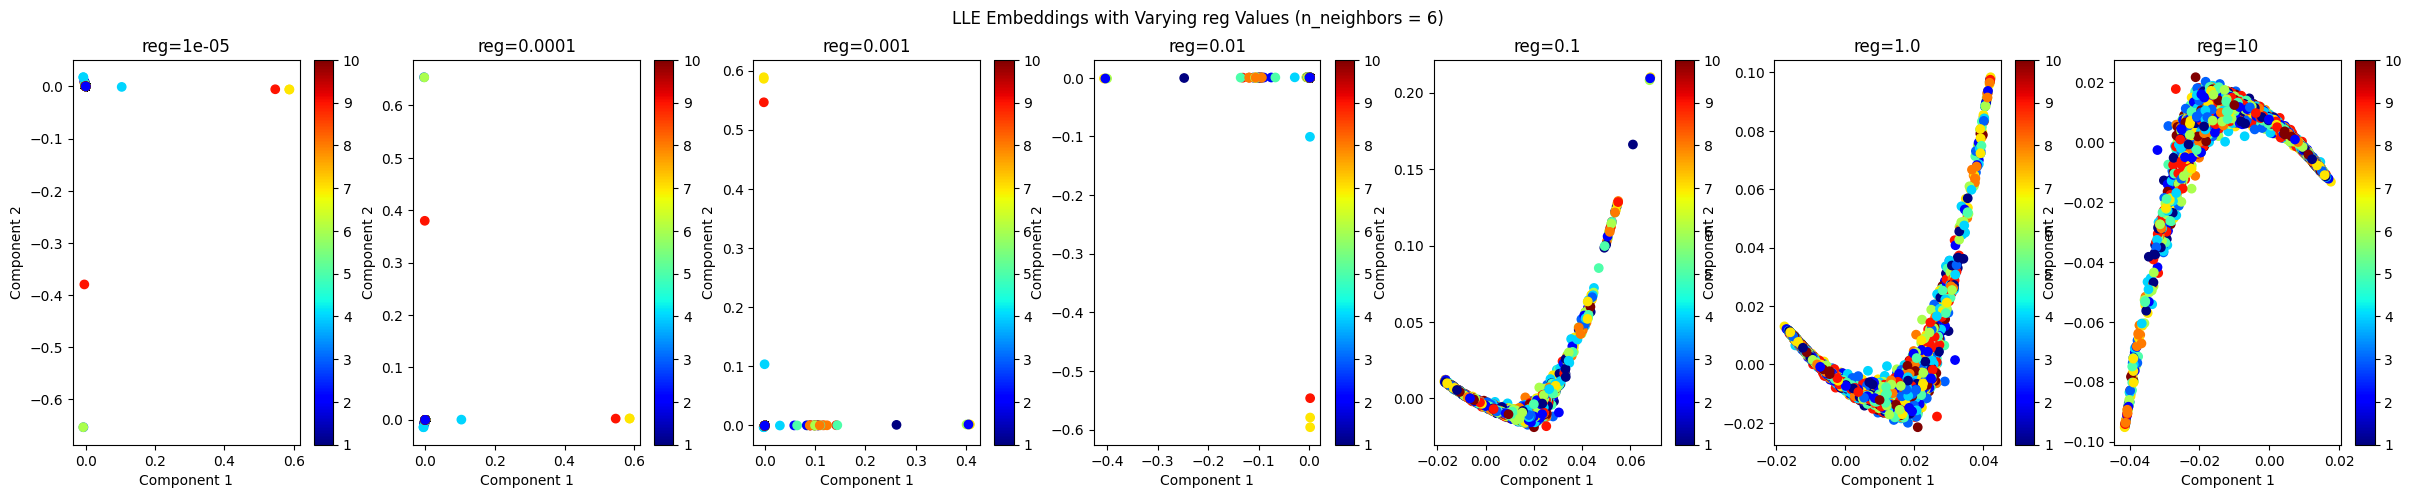

In [ ]:
plot_lle_embeddings(data, n_components, 6, reg_values)
plt.show()

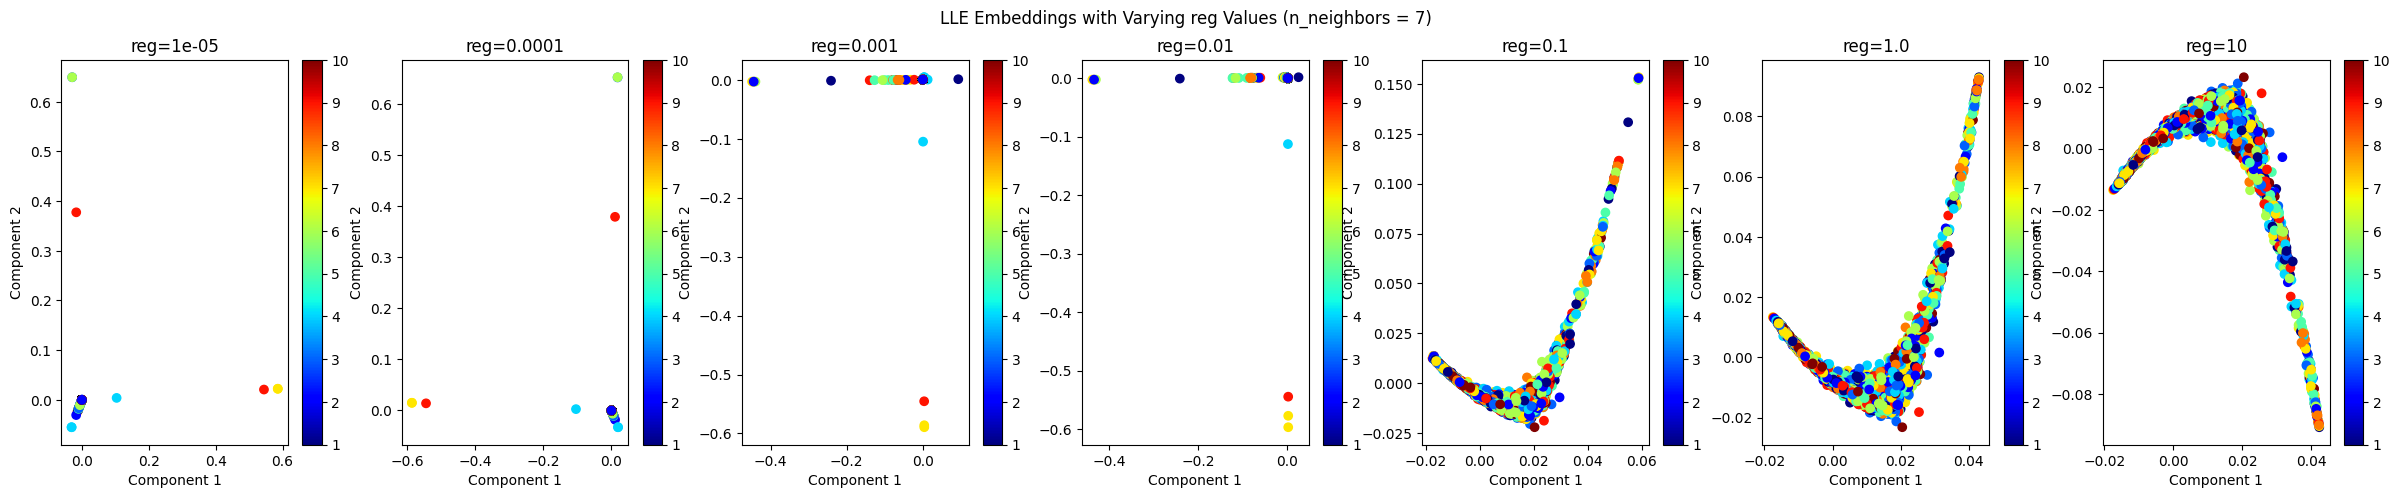

In [ ]:
plot_lle_embeddings(data, n_components, 7, reg_values)
plt.show()

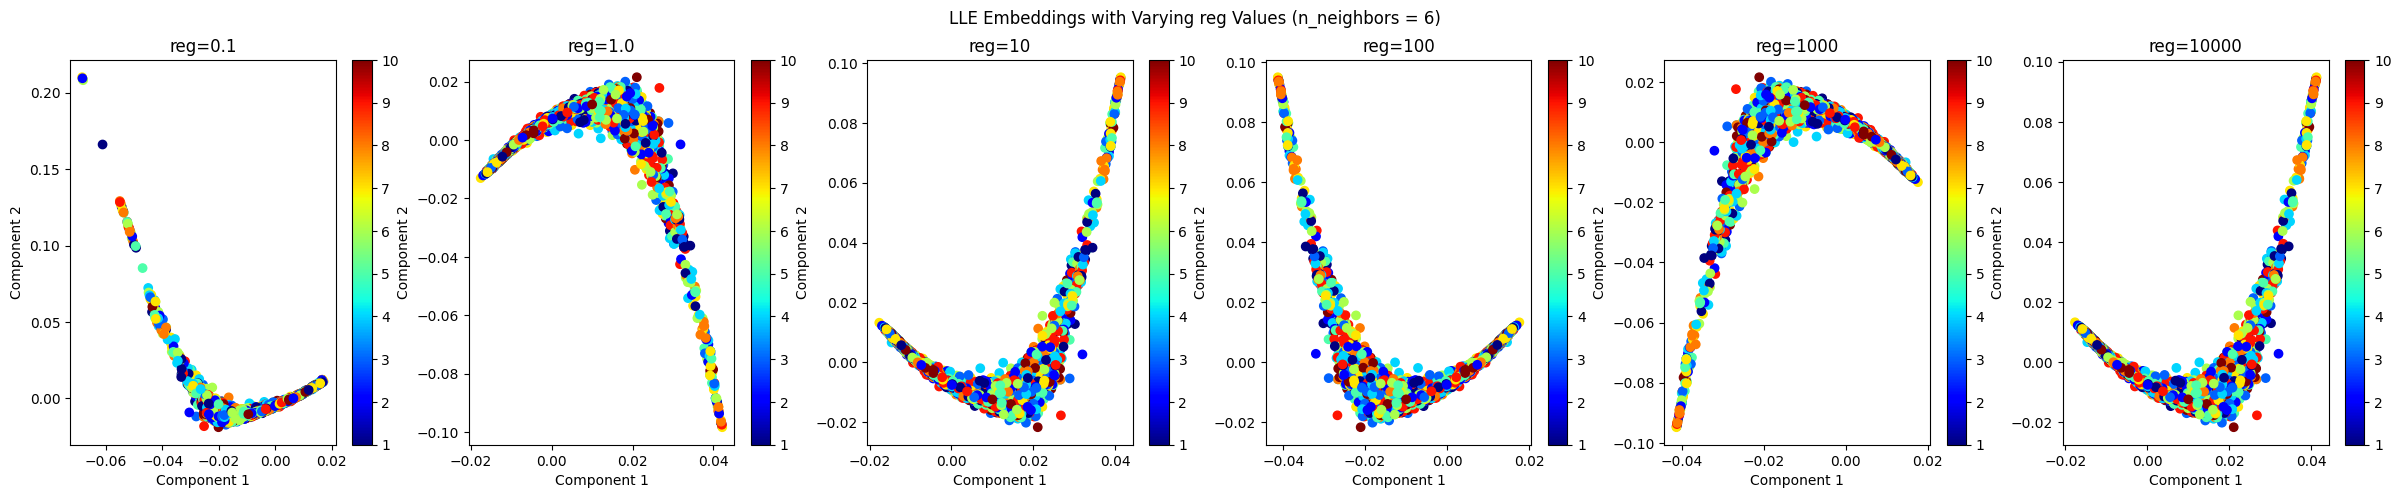

In [ ]:
reg_values = [0.1, 1.0, 10,100,1000,10000]
plot_lle_embeddings(data, n_components, 6, reg_values)
plt.show()

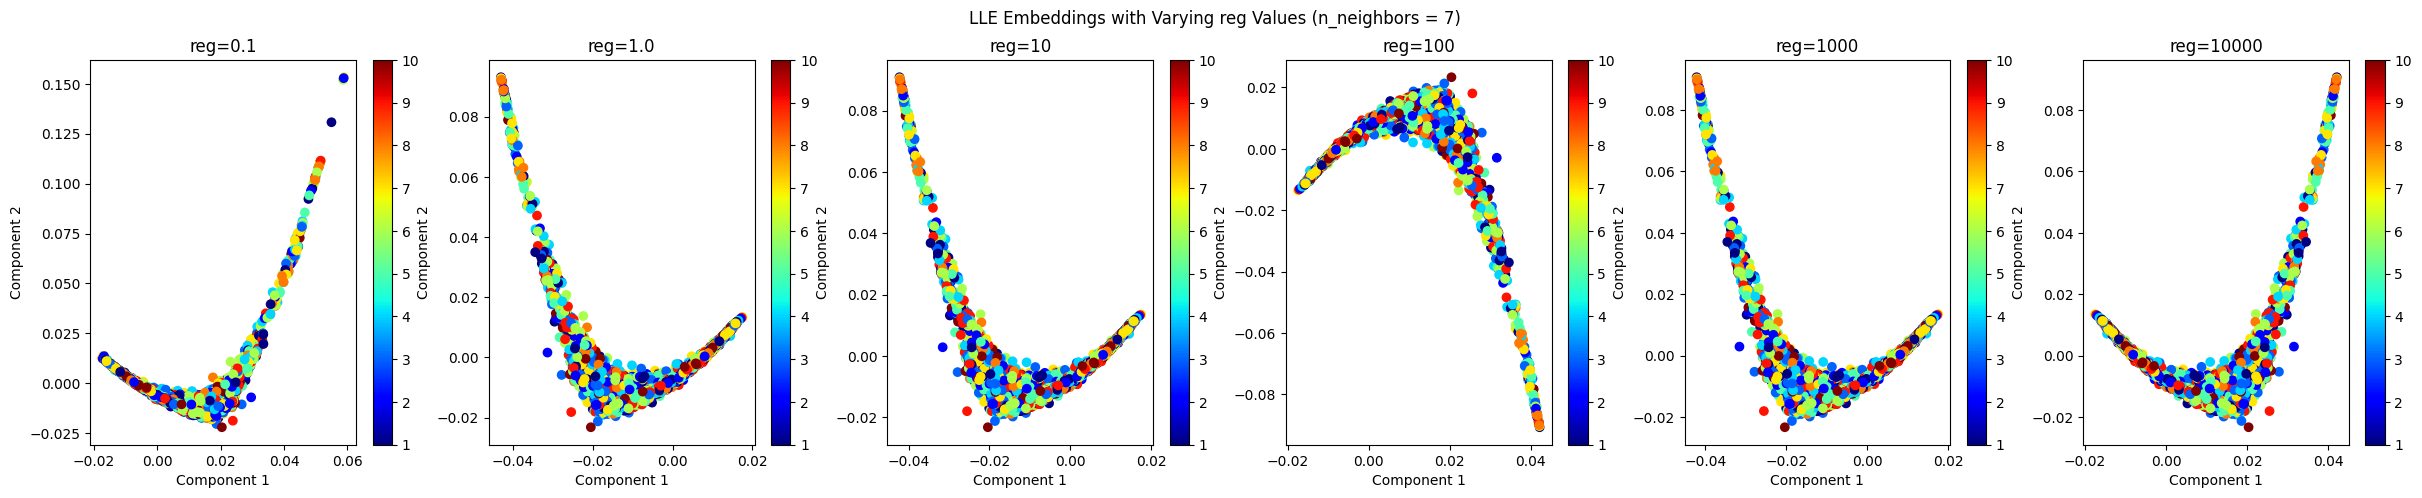

In [ ]:
reg_values = [0.1, 1.0, 10,100,1000,10000]
plot_lle_embeddings(data, n_components, 7, reg_values)
plt.show()

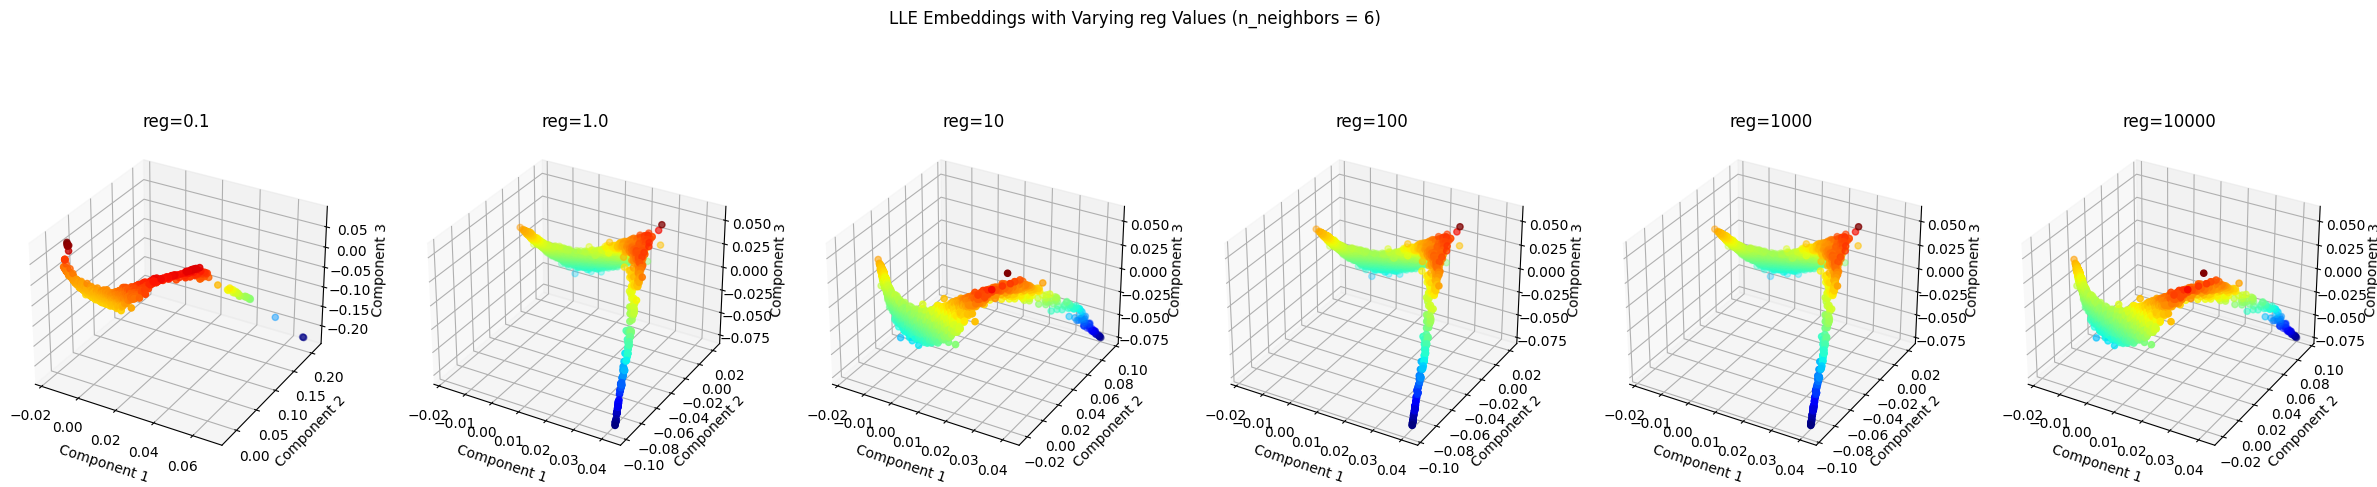

In [ ]:
def plot_lle_embeddings_3d(data, n_components, n_neighbors, reg_values):
    fig = plt.figure(figsize=(30, 6))
    fig.suptitle('LLE Embeddings with Varying reg Values (n_neighbors = {})'.format(n_neighbors))

    for i, reg in enumerate(reg_values):
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, reg=reg, method='standard')
        embedding = lle.fit_transform(data)

        ax = fig.add_subplot(1, len(reg_values), i+1, projection='3d')
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=embedding[:, 2], cmap='jet')
        ax.set_title(f'reg={reg}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')





n_components = 3
n_neighbors = 6  #
reg_values = [0.1, 1.0, 10,100,1000,10000]

# Create multiple 3D plots with varying reg values
plot_lle_embeddings_3d(data, n_components, n_neighbors, reg_values)
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


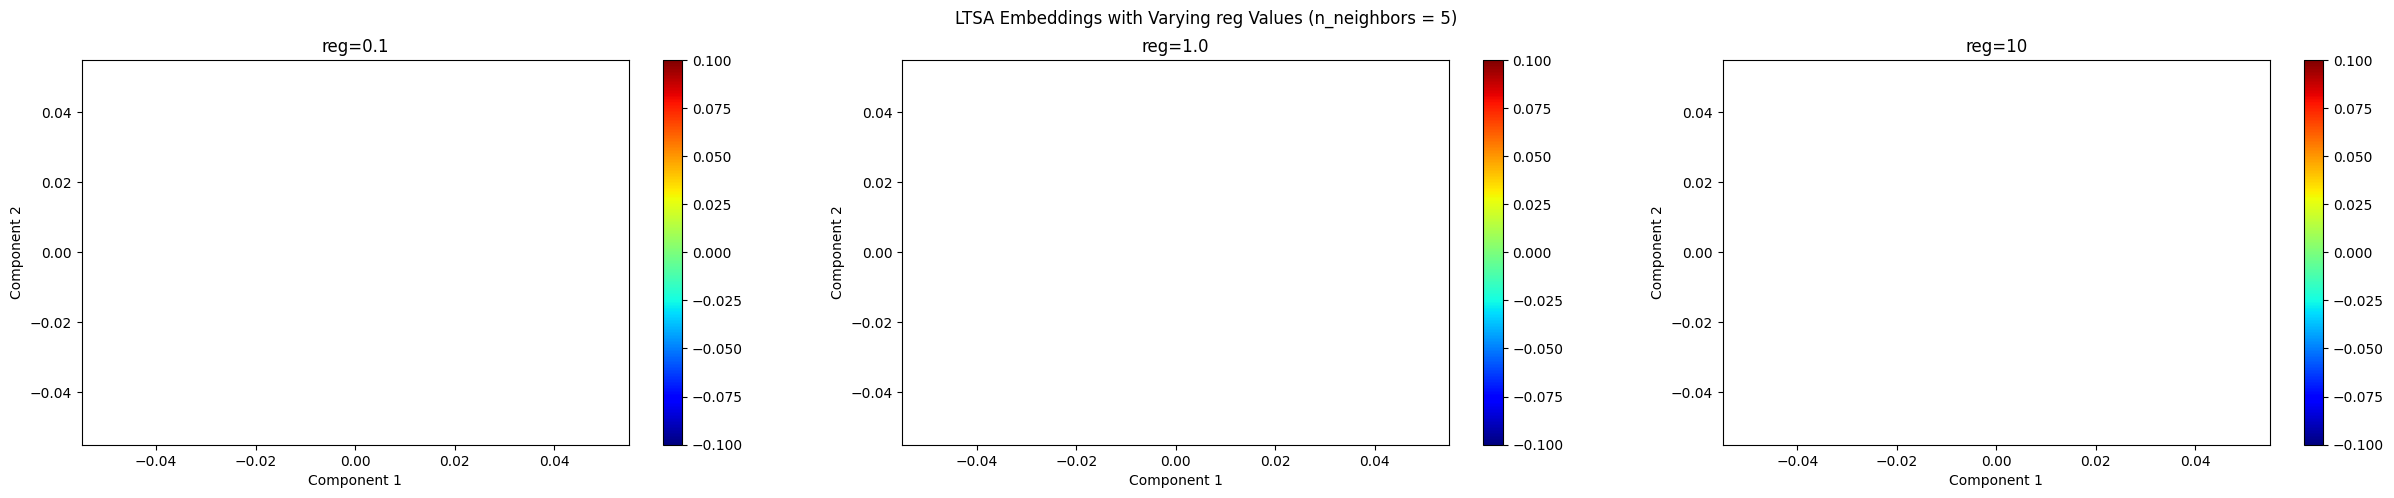

In [ ]:
def plot_lle_embeddings(data, n_components, n_neighbors, reg_values):
    fig, axes = plt.subplots(1, len(reg_values), figsize=(30, 5))
    fig.suptitle('LTSA Embeddings with Varying reg Values (n_neighbors = {})'.format(n_neighbors))

    for i, reg in enumerate(reg_values):
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, tol = 10, max_iter=1000, reg=reg, method='ltsa')
        embedding = lle.fit_transform(data)
        ax = axes[i]
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, cmap='jet')
        ax.set_title(f'reg={reg}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        fig.colorbar(scatter, ax=ax)



n_components = 2
n_neighbors = 5
reg_values = [0.1, 1.0, 10]

# Create multiple plots with varying reg values
plot_lle_embeddings(data, n_components, n_neighbors, reg_values)
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:9

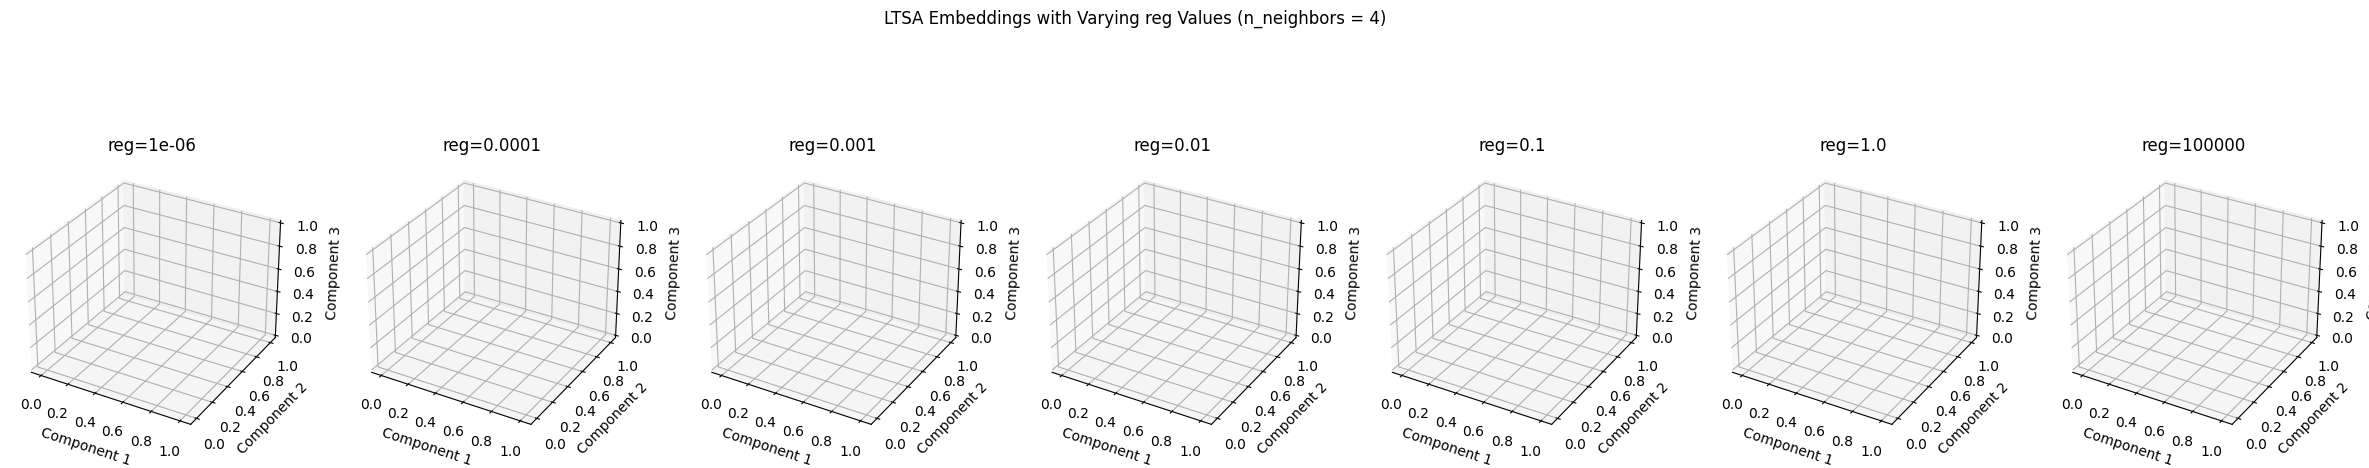

In [ ]:
def plot_ltsa_embeddings_3d(data, n_components, n_neighbors, reg_values):
    fig = plt.figure(figsize=(30, 6))
    fig.suptitle('LTSA Embeddings with Varying reg Values (n_neighbors = {})'.format(n_neighbors))

    for i, reg in enumerate(reg_values):
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, reg=reg, method='ltsa')
        embedding = lle.fit_transform(data)

        ax = fig.add_subplot(1, len(reg_values), i+1, projection='3d')
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=target_labels, cmap='jet')
        ax.set_title(f'reg={reg}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')





n_components = 3
n_neighbors = 4  #
reg_values = [0.000001, 0.0001,0.001, 0.01, 0.1, 1.0, 100000]

# Create multiple 3D plots with varying reg values
plot_ltsa_embeddings_3d(data, n_components, n_neighbors, reg_values)
plt.show()

In [ ]:
# initialize Diffusion map object.
neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}

mydmap = dm.DiffusionMap.from_sklearn(n_evecs=2, k=100, epsilon='bgh', alpha=0.5, neighbor_params=neighbor_params)
# fit to data and return the diffusion map.
dmap = mydmap.fit_transform(data)

KeyboardInterrupt: ignored

In [ ]:
from pydiffmap.visualization import embedding_plot, data_plot

embedding_plot(mydmap, scatter_kwargs = {'c': target_labels, 'cmap': 'jet'})
data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'jet'})

plt.show()